Problem Set 2, Problem 2: Geometric Transformations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Part a)

/tmp/ipykernel_22827/2826420127.py:4: RuntimeWarning: divide by zero encountered in divide
  x_proj = x / denom
/tmp/ipykernel_22827/2826420127.py:4: RuntimeWarning: invalid value encountered in divide
  x_proj = x / denom
/tmp/ipykernel_22827/2826420127.py:5: RuntimeWarning: divide by zero encountered in divide
  y_proj = y / denom
/tmp/ipykernel_22827/2826420127.py:5: RuntimeWarning: invalid value encountered in divide
  y_proj = y / denom
/tmp/ipykernel_22827/2826420127.py:40: RuntimeWarning: invalid value encountered in divide
  angles_proj = np.arccos(dot_product_proj / (norm_curve1_proj * norm_curve2_proj))


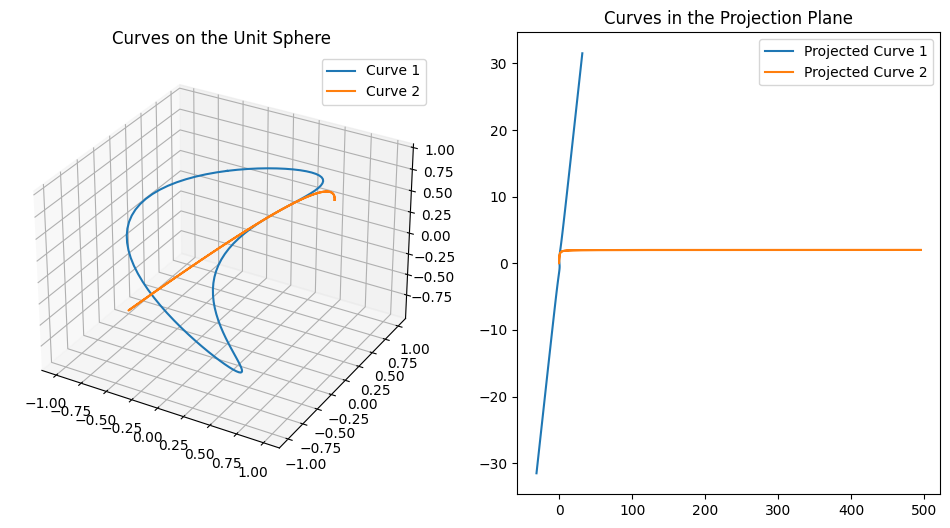

Average angle on the sphere: 66.83 degrees
Average angle in the projection plane: nan degrees


In [2]:
# Stereographic projection function
def stereographic_projection(x, y, z):
    denom = 1 - z
    x_proj = x / denom
    y_proj = y / denom
    return x_proj, y_proj

# Define two curves on the unit sphere
t = np.linspace(0, 2 * np.pi, 100)
curve1_x = np.sin(t) * np.cos(t)
curve1_y = np.sin(t)
curve1_z = np.cos(t)

curve2_x = np.cos(t)
curve2_y = np.sin(t) * np.sin(t)
curve2_z = np.cos(t)

# Project curves using stereographic projection
curve1_proj_x, curve1_proj_y = stereographic_projection(curve1_x, curve1_y, curve1_z)
curve2_proj_x, curve2_proj_y = stereographic_projection(curve2_x, curve2_y, curve2_z)

# Compute tangent vectors on the sphere
curve1_tangent = np.gradient(np.column_stack([curve1_x, curve1_y, curve1_z]), axis=0)
curve2_tangent = np.gradient(np.column_stack([curve2_x, curve2_y, curve2_z]), axis=0)

# Compute tangent vectors in the projection plane
curve1_proj_tangent = np.gradient(np.column_stack([curve1_proj_x, curve1_proj_y]), axis=0)
curve2_proj_tangent = np.gradient(np.column_stack([curve2_proj_x, curve2_proj_y]), axis=0)

# Compute angles between tangents on the sphere
dot_product_sphere = np.einsum('ij,ij->i', curve1_tangent, curve2_tangent)
norm_curve1 = np.linalg.norm(curve1_tangent, axis=1)
norm_curve2 = np.linalg.norm(curve2_tangent, axis=1)
angles_sphere = np.arccos(dot_product_sphere / (norm_curve1 * norm_curve2))

# Compute angles between tangents in the projection plane
dot_product_proj = np.einsum('ij,ij->i', curve1_proj_tangent, curve2_proj_tangent)
norm_curve1_proj = np.linalg.norm(curve1_proj_tangent, axis=1)
norm_curve2_proj = np.linalg.norm(curve2_proj_tangent, axis=1)
angles_proj = np.arccos(dot_product_proj / (norm_curve1_proj * norm_curve2_proj))

# Plot the curves on the sphere
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(curve1_x, curve1_y, curve1_z, label='Curve 1')
ax1.plot(curve2_x, curve2_y, curve2_z, label='Curve 2')
ax1.set_title('Curves on the Unit Sphere')
ax1.legend()

# Plot the curves in the projection plane
ax2 = fig.add_subplot(122)
ax2.plot(curve1_proj_x, curve1_proj_y, label='Projected Curve 1')
ax2.plot(curve2_proj_x, curve2_proj_y, label='Projected Curve 2')
ax2.set_title('Curves in the Projection Plane')
ax2.legend()

plt.show()

# Print comparison of angles
print("Average angle on the sphere: {:.2f} degrees".format(np.degrees(np.mean(angles_sphere))))
print("Average angle in the projection plane: {:.2f} degrees".format(np.degrees(np.mean(angles_proj))))
